In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

df = pd.read_csv('data/len_vs_lfm.csv')

df.head()

,len,lfm,factor
0,0.25,0,242.20
1,0.50,0,171.27
2,1.00,0,121.10
3,2.00,0,85.63
4,3.00,0,69.92


<AxesSubplot:xlabel='len', ylabel='factor'>

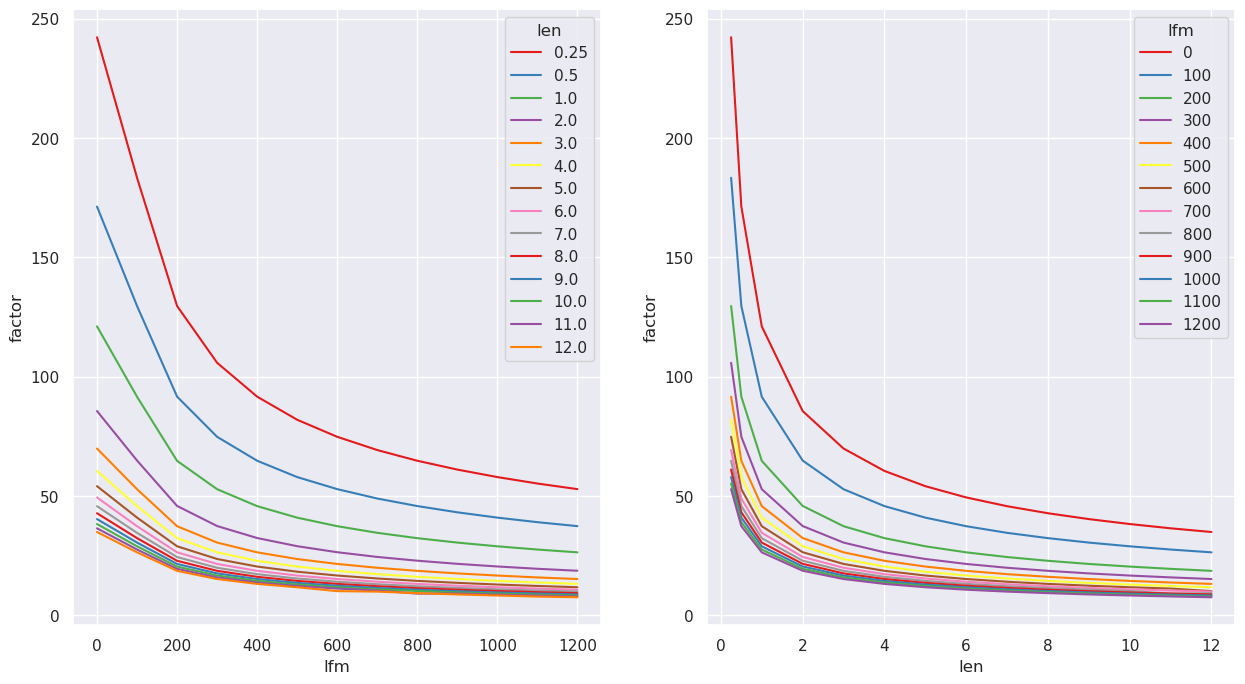

In [97]:
import seaborn as sns
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

sns.lineplot(data = df, x='lfm', y='factor', hue='len', palette='Set1', ax=axes[0])
sns.lineplot(data = df, x='len', y='factor', hue='lfm', palette='Set1', ax=axes[1])

<AxesSubplot:xlabel='len', ylabel='factor'>

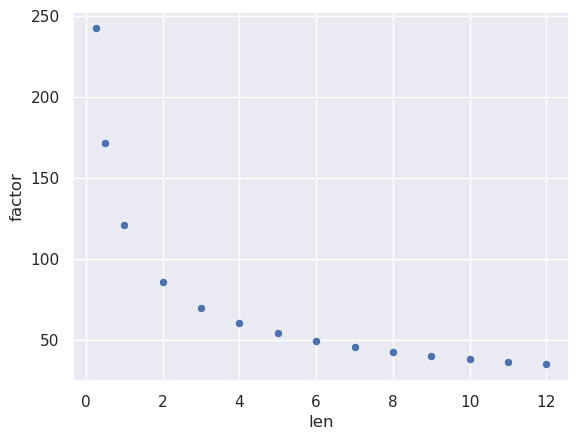

In [314]:
df025 = df.query('lfm == 00')

sns.scatterplot(data = df025, x='len', y='factor')

[126.37229741   0.34822671  28.24612639]


<AxesSubplot:xlabel='len', ylabel='factor'>

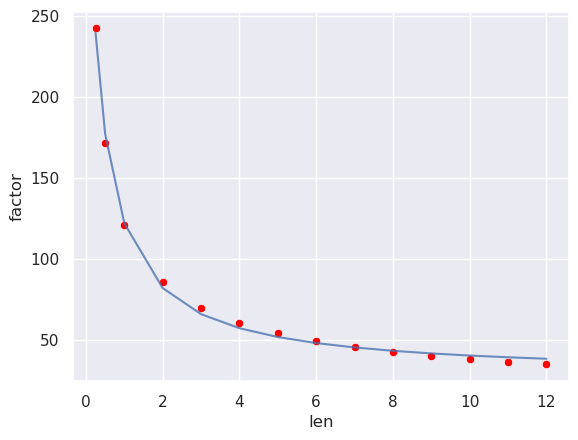

In [316]:
# define the true objective function
def objective025(len, a, b, c):
	return (a / (len + b)) + c

len = df025['len']
# lfm = df025['lfm']
# y = df025['lfm']
z = df025['factor']

popt, pcov = curve_fit(objective025, len, z)
a, b, c = popt

print(popt)

y_line = objective025(len, a, b, c)

sns.scatterplot(x=len, y=z, color = 'red', marker='o')
sns.lineplot(x=len, y=y_line, alpha=0.8)